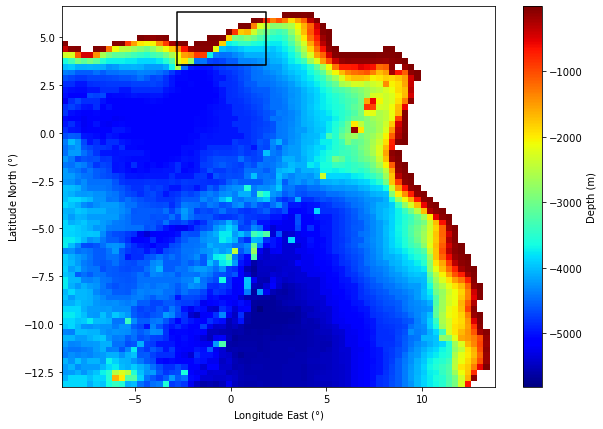

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Specify directory location of global cutout
dir1 = '/home/emmanuel/coessing2023/GulfGuinea/GlobalCutout/'

# Specify directory location for saving figures
dir2 = '/home/emmanuel/coessing2023/GulfGuinea/GlobalCutout/figs_python/'

# Grid dimensions
nx = 69
ny = 66
nz = 50

# Read binary data
XC = np.fromfile(dir1 + 'grid/XC_69x66', dtype='>f4').reshape((ny, nx))
YC = np.fromfile(dir1 + 'grid/YC_69x66', dtype='>f4').reshape((ny, nx))
Depth = np.fromfile(dir1 + 'grid/Depth_69x66', dtype='>f4').reshape((ny, nx))
Depth[Depth == 0] = np.nan

xm, xn = XC.max(), XC.min()
ym, yn = YC.max(), YC.min()

#Define coast of Ghana
ix = np.arange(18,33)
iy = np.arange(55,65)

x = [XC[0,ix[0]],XC[0,ix[-1]],XC[0,ix[-1]],XC[0,ix[0]],XC[0,ix[0]]]
y = [YC[iy[0],0],YC[iy[0],0],YC[iy[-1],0],YC[iy[-1],0],YC[iy[0],0]]

# Plot bathymetry
fig, ax = plt.subplots(figsize=(10,7))
dbt = ax.imshow(-Depth, origin='lower', cmap='jet', extent=[xn, xm, yn, ym])
plt.colorbar(dbt,label='Depth (m)')
# add box to map
ax.plot(x,y, c='k')
plt.xlabel('Longitude East ($\degree$)')
plt.ylabel('Latitude North ($\degree$)')
plt.savefig(os.path.join(dir2, 'bathymetry.jpg'))
plt.show()


<Figure size 432x288 with 0 Axes>

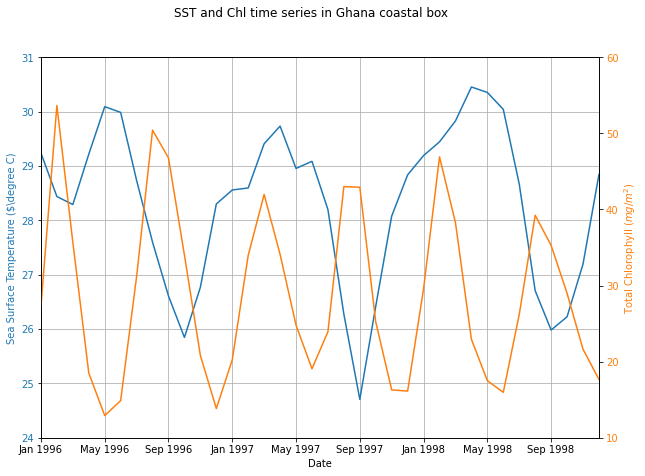

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os

# Specify directory location of global cutout
dir1 = '/home/emmanuel/coessing2023/GulfGuinea/GlobalCutout/'

# Specify directory location for saving figures
dir2 = '/home/emmanuel/coessing2023/GulfGuinea/GlobalCutout/figs_python/'

os.makedirs(os.path.join(dir2, 'SST'), exist_ok=True)
os.makedirs(os.path.join(dir2, 'Chl'), exist_ok=True)

# Grid dimensions
nx = 69
ny = 66
nz = 50
nt = 36

# Read binary data
XC = np.fromfile(dir1 + 'grid/XC_69x66', dtype='>f4').reshape((ny, nx))
YC = np.fromfile(dir1 + 'grid/YC_69x66', dtype='>f4').reshape((ny, nx))
RF = np.fromfile(dir1 + 'grid/RF.data', dtype='>f4')
thk = abs(np.diff(RF))

c_date = datetime(1996, 1, 1)
CHL = np.zeros(nt)
SST = np.zeros(nt)
DTE = []

xm, xn = XC.max(), XC.min()
ym, yn = YC.max(), YC.min()

#Define coast of Ghana
ix = np.arange(18,33)
iy = np.arange(55,65)

x = [XC[0,ix[0]],XC[0,ix[-1]],XC[0,ix[-1]],XC[0,ix[0]],XC[0,ix[0]]]
y = [YC[iy[0],0],YC[iy[0],0],YC[iy[-1],0],YC[iy[-1],0],YC[iy[0],0]]

# Iterate through each month
for mo in range(1,nt + 1):
    DTE.append(c_date.strftime('%b %Y'))
    dte_str = c_date.strftime('%Y%m%dT%H%M%S')

    # Example: Generate monthly-mean SST figure
    fnm = os.path.join(dir1, f'THETA/THETA_69x66x50.{dte_str}')
    # Load the data and create the plot using pcolormesh or contourf
    fld = np.fromfile(fnm, dtype='>f4').reshape((nz,ny, nx))
    fld = fld[0,:,:]
    fld[fld == 0] = np.nan
    
    # for time series plot
    tmp = fld[iy[:,None],ix]
    idx = np.where(tmp is not np.nan)
    SST[mo-1] = np.mean(tmp[idx])
    
    # plot sea surface temperature
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,7))
    sst = ax.imshow(fld, origin='lower', cmap='jet', extent=[xn, xm, yn, ym])
    sst.set_clim(20,32)
    m = c_date.strftime('%b %Y')
    plt.title(f'Sea Surface Temperature ($\degree C$) on {m}')
    plt.xlabel('Longitude East ($\degree$)')
    plt.ylabel('Latitude North ($\degree$)')
    plt.savefig(os.path.join(dir2, f'SST/month{mo:02}.jpg'))
    plt.close()

    
    # Example: Generate monthly-mean Chl figure
    fld = np.zeros((ny,nx))
    for chl in range(1, 6):
        fnm = dir1 + f'Chl{chl}/Chl{chl}_69x66x50.{dte_str}'
        tmp = np.fromfile(fnm, dtype='>f4').reshape(nz, ny, nx)
        for k in range(nz):
            fld = fld + thk[k]*tmp[k,:,:]
    fld[fld == 0] = np.nan
    
    # for time series plot
    tmp = fld[iy[:,None],ix]
    idx = np.where(tmp is not np.nan)
    CHL[mo-1] = np.mean(tmp[idx])
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,7))
    ch = ax.imshow(fld, origin='lower', cmap='turbo', extent=[xn, xm, yn, ym])
    plt.colorbar(ch,label='Total Chlorophyll ($mg/m^2$)')
    plt.plot(x,y, c='k')
    ch.set_clim(0, 80)
    m = c_date.strftime('%b %Y')
    plt.title(f'Total Chlorophyll ($mg/m^2$) on  {m}')
    plt.xlabel('Longitude East ($\degree$)')
    plt.ylabel('Latitude North ($\degree$)')
    plt.savefig(os.path.join(dir2, f'Chl/month{mo:02}.jpg'))
    plt.close()
    
    c_date = c_date + relativedelta(months=1)


    
# Create the plot
fig, ax1 = plt.subplots(figsize=(10,7))

# Plot the first dataset using the left y-axis
ax1.plot(DTE, SST, color='tab:blue', label='SST')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sea Surface Temperature ($\degree C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(24, 31)
ax1.set_xlim(DTE[0],DTE[-1])

# Create a twin y-axis on the right side for the second dataset
ax2 = ax1.twinx()
ax2.plot(DTE, CHL, color='tab:orange', label='CHL')
ax2.set_ylabel('Total Chlorophyll ($mg/m^2$)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(10, 60)
ax1.set_xticks(DTE[::4])

# Add a common title and legend
fig.suptitle('SST and Chl time series in Ghana coastal box')
#fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))
ax1.grid(True)

# Show the plot
plt.savefig(os.path.join(dir2, f'SST_CHL_TimeSeries.jpg'))
plt.show()

In [3]:
#Convert frames to movie using ffmpeg for SST
os.system(f'ffmpeg -r 5 -pattern_type glob -i "{dir2}SST/month*.jpg" -vcodec libx264 -vf "scale=800:-1" -crf 25 -pix_fmt yuv420p {dir2}SST.mp4')

# Convert frames to movie using ffmpeg for Chl
os.system(f'ffmpeg -r 5 -pattern_type glob -i "{dir2}Chl/month*.jpg" -vcodec libx264 -vf "scale=800:-1" -crf 25 -pix_fmt yuv420p {dir2}Chl.mp4')

256